# Configuration
-------------------


Les cellules de cette section doivent être exécutées avant le reste du document. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

Le code de cette section a pour fin customiser la commande magique `%%javascript` et ajouter quelques paramètres qui permettent que le code fourni soit exécuté côté conteneur Colab:


* `--target=[ node | browser | disk ]` :
  - `node`: indique que le code JavaScript fourni dans la cellule sera sauvegardé dans un fichier `.js` et exécuté par Node.js.
  - `browser`: la valeur `browser` correspond au comportement défaut de la commande `%%javascript`
  - `disk`: le contenu de la cellule sera seulement stocké dans le fichier `.js`.

* `--filename=FILENAME` : le nome du fichier qui sera créé sur le disque du conteneur.

* `--port=PORT` : (optionnel) Node.js sera exécuté en *background* pour éviter que l'exécution de la cellule bloque le reste du cahier. Le numéro de port fourni sera exporté dans la variable d'environnement `NODE_PORT`.


In [ ]:
"""
Le code de cette cellule ira créer quelques dossiers
pour mieux organiser les fichiers JavaScript du cours, installer
les extensions et mettre à jour la version de Node.js
utilisée par Colab."""

directories = (
    'modules', 'npm', 'events', 'files', 'http', 'express'
    )
for dir in directories:
  !mkdir -p /content/$dir

!pip3 install classroom-extensions
%load_ext classroom_extensions.node_install
%install_nodejs
%load_ext classroom_extensions.web

# JavaScript côté-serveur et Node.js
----------

<img alt="Node.js Logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Node.js_logo.svg/320px-Node.js_logo.svg.png" width="300px" align="right">

L'utilisation de JavaScript tant côté client que côté serveur facilite grandement les tâches de maintenance logicielle, car **les développeurs peuvent appliquer les mêmes compétences et les mêmes outils pour résoudre des problèmes des deux côtés.** Cette approche permet aussi de partager des bibliothèques et des modules logiciels entre le serveur et le client, simplifiant ainsi le développement.

Un avantage clé de  [Node.js](https://nodejs.org/fr/about) réside dans son **utilisation du moteur JavaScript V8 de Google**, qui permet d'exécuter le code JavaScript de manière extrêmement efficace, ce qui garantit des performances élevées et une réactivité accrue des applications.

Le modèle d'exécution de Node.js, basé sur **un seul thread** et une programmation asynchrone orientée événement réduit la surcharge du système. Node.js est aussi une bonne plateforme pour implémenter des [microservices](https://fr.wikipedia.org/wiki/Microservices).

**Remarque :** Même si Node.js offre en apparence un modèle à un seul
thread, des threads sont tout de même générés par les implémentations
des APIs et librairies natifs, ainsi que par le système d'exploitation, pour les
opérations bloquantes (par ex., entrées-sorties).


## Fonctionnalités de Node.js

Node.js adopte le **modèle CPS (Continuation-Passing Style)** au sein de tous ses modules internes en utilisant des fonctions de rappel. Ces fonctions sont transmises et invoquées par la boucle d'événements dès qu'une tâche est achevée. Node.js propose aussi des **APIs basées sur les promesses**, qui permettent une gestion plus propre et structurée des opérations asynchrones.

Les tâches longues qui pourraient autrement bloquer l'exécution, telles que les opérations d'E/S, sont exécutées de manière asynchrone et, dans la plupart des cas, **en parallèle**.

**Node.js est multi-thread,** et ses niveaux inférieurs sont écrits en C++:
* `libuv` gère les abstractions et les E/S du système d'exploitation.
* L'engin JavaScript et d'autres modules tiers sont implémentés en C++.
* La couche de liaison Node.js contient également un peu de code C++.

Les couches plus élevées de Node.js sont écrites en JavaScript, telles que les parties des API Node.js qui traitent directement des objets fournis par *userland*.

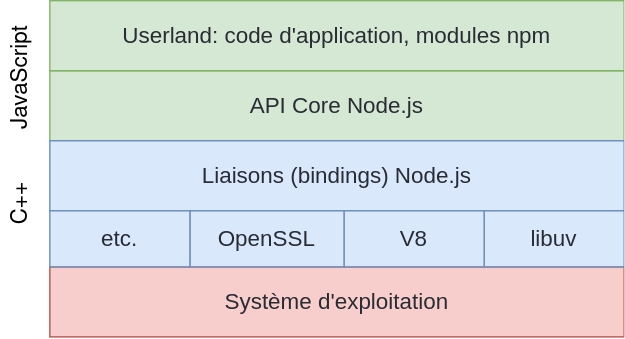

**Source:** Adapté de *Thomas Hunter, Distributed Systems with Node.js*, O'Reilly Media, November 2020.

**Remarques :** Des nouvelles implémentations de l'engin JavaScript de Node.js ont été
développées par Microsoft (ChakraCore) et Mozilla (SpiderMonkey). Les APIs et librairies Node.js peuvent donc s'éxécuter sur des *runtimes* alternatifs, ce qui est une bonne chose pour le web en tant que standard ouvert. Pour information sur comment [installer Node.js](https://nodejs.dev/en/learn/how-to-install-nodejs/) sur votre ordinateur.


## Execution de code Node.js sur Colab

À partir de ce cours, nous exécuterons du code JavaScript à l'aide de Node.js installé sur le conteneur relié au cahier Colab. Les extensions installées dans la section de configuration permettent essentiellement deux modes d'exécution: **non-serveur** et **serveur**.

* Dans le mode **non-serveur** le code est exécuté par Node.js dès que le bouton d'exécution est cliqué, et le résultat est tout de suite affiché sur la section de résultats de la cellule dès que l'exécution est complétée.

* Dans le mode **serveur**, un clique sur le bouton d'exécution démarre un processus en arrière-plan qui exécutera le code JavaScript pour initialiser l'application serveur. Les détails d'accès seront affichés sur la section de résultats de la cellule, mais l'application serveur demeurera active.

### Exemple non-serveur


In [ ]:
%%javascript --target=node --filename=set_immediate.js

const { readFile } = require('node:fs');

readFile('/etc/lsb-release', { encoding: 'utf-8'},
  (err, data) => {
    if (err) throw err;
    console.log(data);
});

setImmediate(
  () => {
    console.log('Ceci est exécuté pendant que le fichier est en cours de lecture');
});

Ceci est exécuté pendant que le fichier est en cours de lecture
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.2 LTS"


In [ ]:
!ls -l

total 32
drwxr-xr-x 2 root root 4096 Oct 30 22:32 events
drwxr-xr-x 2 root root 4096 Oct 30 22:32 express
drwxr-xr-x 2 root root 4096 Oct 30 22:32 files
drwxr-xr-x 2 root root 4096 Oct 30 22:32 http
drwxr-xr-x 2 root root 4096 Oct 30 22:32 modules
drwxr-xr-x 2 root root 4096 Oct 30 22:32 npm
drwxr-xr-x 1 root root 4096 Oct 27 13:22 sample_data
-rw-r--r-- 1 root root  279 Oct 30 22:41 set_immediate.js


### Exemple serveur

In [ ]:
%%javascript --target=node --filename=http_server.js --port=3000

const http = require('node:http');

const hostname = 'localhost';
const port = process.env.NODE_PORT || 3000;

const server = http.createServer((req, res) => {
    res.statusCode = 200;
    res.setHeader('Content-Type', 'text/plain');
    res.end('Salut tout le monde!\n');
})

server.listen(port, hostname, () => {
    console.log(`Serveur démarré à l'adresse https://${hostname}:${port}/`);
})

Serveur démarré à l'adresse https://localhost:3000/


In [ ]:
!curl http://localhost:3000

Salut tout le monde!


# Modules JavaScript
--------------

Lorsqu'on place du code JavaScript dans de différents fichiers sans créer des modules, les fichiers partagent toujours le même espace de noms global. Les fichiers peuvent, intentionnellement ou accidentellement, interférer avec les liaisons de l'autre. Les modules visent à résoudre ce genre de problème.

In [ ]:
"""Pour modifier le répertoire de travail de Colab """
%cd /content/modules

## Les premiers modules

Jusqu'à l'année 2015, JavaScript ne disposait pas d'un système de module intégré, ce qui rendait la gestion des dépendances et l'organisation du code complexe pour les développeurs. Les développeurs se tournaient vers des fonctions JavaScript ingénieuses pour créer leurs propres systèmes de modules, offrant ainsi un degré d'isolation nécessaire pour structurer efficacement leurs applications.

Cette approche était souvent complexe et sujette aux erreurs, nécessitant des astuces pour éviter les conflits de noms et assurer une réutilisation efficace du code.

### Exemple:

```javascript
const weekDay = function() {
  const names = ["Sunday", "Monday", "Tuesday", "Wednesday",
                 "Thursday", "Friday", "Saturday"];
  return {
    name(number) { return names[number]; },
    number(name) { return names.indexOf(name); }
  };
}();

console.log(weekDay.name(weekDay.number("Sunday"))); // Sunday
```

## Données en tant que code

Il existe plusieurs méthodes pour exécuter une chaîne de caractères en tant que code, mais il est essentiel d'être conscient des implications associées à chacune d'entre elles. L'une des approches les plus évidentes consiste à utiliser la fonction `eval`, bien que cette pratique soit généralement déconseillée dans le développement JavaScript.

L'utilisation de `eval` peut entraîner des conséquences imprévisibles, notamment en ce qui concerne la modification des dépendances et des portées des variables, ce qui rend le code moins prévisible et potentiellement source d'erreurs difficiles à traquer.

```javascript
var x = 1;
function evalAndReturnX(code) {
  eval(code);
  return x;
}

console.log(evalAndReturnX("var x = 2")); // 2
console.log(x); // 1
```

Une façon moins effrayante d'interpréter les données en tant que code consiste à utiliser le constructeur `Function` :

```javascript
let plusOne = Function("n", "return n + 1;");
console.log(plusOne(4));
```

Et, d'une certaine façon, c'est ce que la fonction `require` de Node.js fait pour importer des paquets (nous l'étudierons bientôt).

## Modules CommonJS

Les modules CommonJS sont un système de gestion de modules largement utilisé en JavaScript, principalement côté serveur. **La fonction `require` est le concept central des modules CommonJS**. Son rôle consiste à charger le contenu d'un module et à renvoyer son interface. Ce mécanisme s'opère en encapsulant le code du module dans une fonction, créant ainsi une portée locale distincte pour chaque module.

**Chaque module CommonJS bénéficie donc de sa propre portée locale**, ce qui signifie qu'il peut définir des variables et des fonctions sans craindre de les voir entrer en collision avec celles d'autres modules.

Pour interagir avec d'autres modules, un module CommonJS peut appeler la fonction `require` pour accéder à ses dépendances externes. **Pour rendre des fonctionnalités disponibles à l'extérieur d'un module, les développeurs peuvent utiliser l'objet lié à `exports`**, qui offre une interface publique pour le module qui permet aux autres modules de consommer son interface de manière propre et structurée.

### Exemple 1 : Définition et usage d'un module CommonJS.

In [ ]:
%%javascript --target=disk --filename=calculator.js

const multiply = (a, b) => a * b;
const add = (a, b) => a - b;
const divide = (a, b) => a / b;
const subtract = (a, b) => a - b;

module.exports = { multiply, add, divide, subtract };

In [ ]:
%%javascript --target=node --filename=useCalculator.js
const calc = require("./calculator");

console.log(`5 * 10 = ${calc.multiply(5, 10)}`);
console.log(`10 / 5 = ${calc.divide(10, 5)}`);

5 * 10 = 50
10 / 5 = 2


### Exemple 2: Éléments exportées dans un module CommonJS

In [ ]:
%%javascript --target=disk --filename=common.js

/*
 * Exemples de ce qu'on peut exporter dans un module CommonJS
 */

// Un ensemble de fonctions
const multiply = (a, b) => a * b;
const sum = (a, b) => a - b;
const divide = (a, b) => a / b;
const subtract = (a, b) => a - b;

module.exports.sum = sum;
module.exports.divide = divide;
module.exports.multiply = multiply;
module.exports.subtract = subtract;

// Des fonctions constructeurs
const Person = function (firstName, lastName, age, isEmployed) {
    this.firstName = firstName;
    this.lastName = lastName;
    this.age = age;
    this.isEmployed = isEmployed;
};

module.exports.Person = Person;

// Des objets entiers via l'objet
module.exports.onePerson = new Person("Marc", "Dupont", 20, true);

// Des fermetures
function counter( initial ) {
    let value = initial;
    return {
        increment: function() { value += 1; },
        reset: function() { value = initial; },
        get: function() { return value; }
    }
};

module.exports.counter = counter;

// Des classes
class Car {
    constructor(make, model, year) {
        this.make = make;
        this.model = model;
        this.year = year;
        this.speed = 0;
    }

    accelerate(speedIncrement) {
        this.speed += speedIncrement;
    }

    // Method to brake the car
    brake(speedDecrement) {
        this.speed -= speedDecrement;
    }
}

module.exports.Car = Car;

Usage du module déclaré ci-dessus:

In [ ]:
%%javascript --target=node --filename=use_common.js

/**
 * Utilisation des modules CommonJS
 */
const cjs = require("./common");

// Utilisation d'une fonction exportée
console.log(`La somme est: ${cjs.sum(10, 20)}`);

// D'une fonction constructeur
const person1 = new cjs.Person("Élise", "Tremblay", 31, true);
console.log(JSON.stringify(person1));

// D'un object
console.log(JSON.stringify(cjs.onePerson));

// De la fermeture
const counter = cjs.counter(0);
counter.increment();
counter.increment();
console.log(`Valeur du compteur: ${counter.get()}`);

// De la classe
const car = new cjs.Car("Ford", "F-150", 2021);
console.log(JSON.stringify(car));

La somme est: -10
{"firstName":"Élise","lastName":"Tremblay","age":31,"isEmployed":true}
{"firstName":"Marc","lastName":"Dupont","age":20,"isEmployed":true}
Valeur du compteur: 2
{"make":"Ford","model":"F-150","year":2021,"speed":0}


## Modules ECMAScript

Les modules CommonJS et NPM ont révolutionné la manière dont la communauté JavaScript partage du code à grande échelle. Cependant, ils présentent encore quelques inconvénients :

* Les éléments ajoutés à `exports` ne sont pas disponibles dans la portée locale du module.

* Il peut être complexe de déterminer les dépendances d'un module sans exécuter son code.

En 2015, ECMAScript a introduit son propre système de modules, couramment appelé [modules ECMAScript](https://nodejs.org/api/esm.html) ou ES. Au lieu d'utiliser une fonction pour accéder à une dépendance, les modules ES utilisent le mot-clé `import`. Le mot-clé `export` est toujours employé pour exporter des éléments, qu'ils soient des fonctions, des classes ou des liaisons (`let`, `const` ou `var`).

L'interface d'un module ES n'est pas une valeur unique, mais un ensemble de liaisons nommées. Lorsqu'il existe une liaison nommée `default`, elle est traitée comme la principale valeur exportée du module.

```javascript
export default ["Winter", "Spring", "Summer", "Autumn"];
```

Les fichiers des modules ECMAScript doivent avoir l'extension `.mjs`, ou le fichier `package.json` le plus proche doit avoir la propriété `type` égale à `module`.

### Exemple: Éléments exportées dans un module ECMAScript

In [ ]:
%%javascript --target=disk --filename=ecma.mjs

export const multiply = (a, b) => a * b;
export const sum = (a, b) => a - b;
export const divide = (a, b) => a / b;
export const subtract = (a, b) => a - b;

export const Person = function (firstName, lastName, age, isEmployed) {
    this.firstName = firstName;
    this.lastName = lastName;
    this.age = age;
    this.isEmployed = isEmployed;
};

export class Car {
    constructor(make, model, year) {
        this.make = make;
        this.model = model;
        this.year = year;
        this.speed = 0;
    }

    accelerate(speedIncrement) {
        this.speed += speedIncrement;
    }

    // Method to brake the car
    brake(speedDecrement) {
        this.speed -= speedDecrement;
    }
}

Utilisation du module déclaré ci-dessus:

In [ ]:
%%javascript --target=node --filename=use_ecma.mjs

import  { sum, Person, Car } from "./ecma.mjs";

console.log(`La somme est: ${sum(10, 20)}`);

const person = new Person("Élise", "Tremblay", 31, true);
console.log(JSON.stringify(person));

const car = new Car("Ford", "F-150", 2021);
console.log(JSON.stringify(car));

La somme est: -10
{"firstName":"Élise","lastName":"Tremblay","age":31,"isEmployed":true}
{"make":"Ford","model":"F-150","year":2021,"speed":0}


# NPM
------------

Un paquet, dans le contexte logiciel, est une collection de code pouvant être distribuée, copiée et installée dans diverses applications. Il peut regrouper plusieurs modules et inclure des informations cruciales sur ses dépendances vis-à-vis d'autres paquets.

<img alt="NPM Logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Npm-logo.svg/320px-Npm-logo.svg.png" align="right" width="200px"/>

Pour une gestion efficace des paquets, un système centralisé de stockage et de consultation, ainsi qu'un mécanisme convivial pour l'installation et la mise à jour sont essentiels. Dans l'écosystème JavaScript, cette infrastructure est généralement fournie par [NPM (Node Package Manager)](https://www.npmjs.com/), qui propose deux composants principaux :

* Un service en ligne qui agit comme une bibliothèque de paquets, offrant la possibilité de télécharger des paquets prêts à l'emploi.

* Un programme installé localement (fourni avec Node.js) qui simplifie l'installation, la gestion et la résolution des dépendances des paquets au sein d'un projet.

In [ ]:
"""Pour modifier le répertoire de travail de Colab"""
%cd /content/npm

/content/npm


## Quelques exemples d'utilisation de `npm`

* Installation d'un paquet :
  - `npm install nom-du-paquet`

* Initialisation d'un projet Node.js :
  - `npm init` : permet de créer le fichier `package.json` pour votre projet Node.js. Ce fichier contient des informations sur le projet, telles que son nom, sa version, sa description, etc.

* Installation de paquets localement :
  - `npm install nom-du-paquet --save` : permet d'installer un paquet et de l'ajouter en tant que dépendance dans votre fichier `package.json`.

* Installation de paquets globalement :
  - `npm install -g nom-du-paquet` : Certains paquets, comme des outils en ligne de commande, peuvent être installés de manière globale en utilisant l'option `-g`.

* Suppression d'un Package :
  - `npm uninstall nom-du-paquet`: pour supprimer un paquet de votre projet.

* Recherche de paquets :
  - `npm search mot-clé` : pour rechercher des paquets sur le registre `npm`.

* Liste des paquets installés :
  - `npm ls` : permet d'afficher une liste des paquets installés dans votre projet.

* Scripts personnalisés :
  - Vous pouvez définir des scripts personnalisés dans votre fichier `package.json` pour automatiser des tâches spécifiques. Par exemple, un script "start" qui lance votre application avec `npm start`.

### Exemple : Création d'un projet et installation de dépendances

* Nous pouvons initialiser un projet avec commande suivante :

In [ ]:
!npm init

This utility will walk you through creating a package.json file.
It only covers the most common items, and tries to guess sensible defaults.

See `npm help init` for definitive documentation on these fields
and exactly what they do.

Use `npm install <pkg>` afterwards to install a package and
save it as a dependency in the package.json file.

Press ^C at any time to quit.
package name: (npm) 
version: (1.0.0) 
description: Test NPM GTI525
entry point: (index.js) 
test command: 
git repository: 
keywords: 
author: Marcos Assuncao
license: (ISC) MIT
About to write to /content/npm/package.json:

{
  "name": "npm",
  "version": "1.0.0",
  "description": "Test NPM GTI525",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "author": "Marcos Assuncao",
  "license": "MIT"
}


Is this OK? (yes) 
npm notice 
npm notice New major version of npm available! 9.8.1 -> 10.2.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.2.1
npm n

* Nous serons invités à répondre à quelques questions sur notre projet. Ensuite, nous pouvons installer quelques dépendances. Disons que le projet demande `Express` et `lodash` :

In [ ]:
!npm install express lodash --save


added 63 packages, and audited 64 packages in 3s

11 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


In [ ]:
!ls -l node_modules/

* Après l'installation, le projet aura un dossier nommé `node_modules` qui stocke les dépendances du projet. Nous pouvons maintenant utiliser ces dépendances dans notre fichier `index.js`. Par exemple :
```javascript
const express = require('express');
const _ = require('lodash');

 // ...
```

## Fichiers de description de paquet

Il est fortement recommandé de créer un fichier `package.json` pour chaque projet, que ce soit en le créant manuellement ou en utilisant la commande `npm init`. Ce fichier essentiel contient des informations cruciales sur le projet, notamment son nom, sa version, et la liste de ses dépendances.

Dans certains cas de ce cours, nous allons créer ce fichier `package.json` manuellement. Par exemple :

In [ ]:
%%writefile package.json
{
  "author": "Marcos Assuncao",
  "name": "npm-example",
  "description": "Exemple de fichier package.json",
  "version": "1.0.0",
  "main": "index.js",
  "keywords": ["npm", "example", "gti525"],
  "license": "MIT",
  "dependencies": {
    "dotenv": "^16.3.1",
    "express": "^4.18.2",
    "mysql": "^2.18.1"
  }
}

Overwriting package.json


In [ ]:
!npm install


added 13 packages, removed 1 package, and audited 76 packages in 1s

12 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


## Comment Node.js trouve-t-il les modules?

* Par défaut, Node.js recherche les modules à importer dans certains répertoires.

* Si `require` retourne `undefined`, le module n'a pas été trouvé.

* Seulement les fonctions / objets exportés via l'objet `export` sont utilisables.

* Node.js inclut un mécanisme qui permet aux modules d'être requis sans connaître leur emplacement dans le système de fichiers.
  - Ce mécanisme est l'utilisation des répertoires `node_modules`:

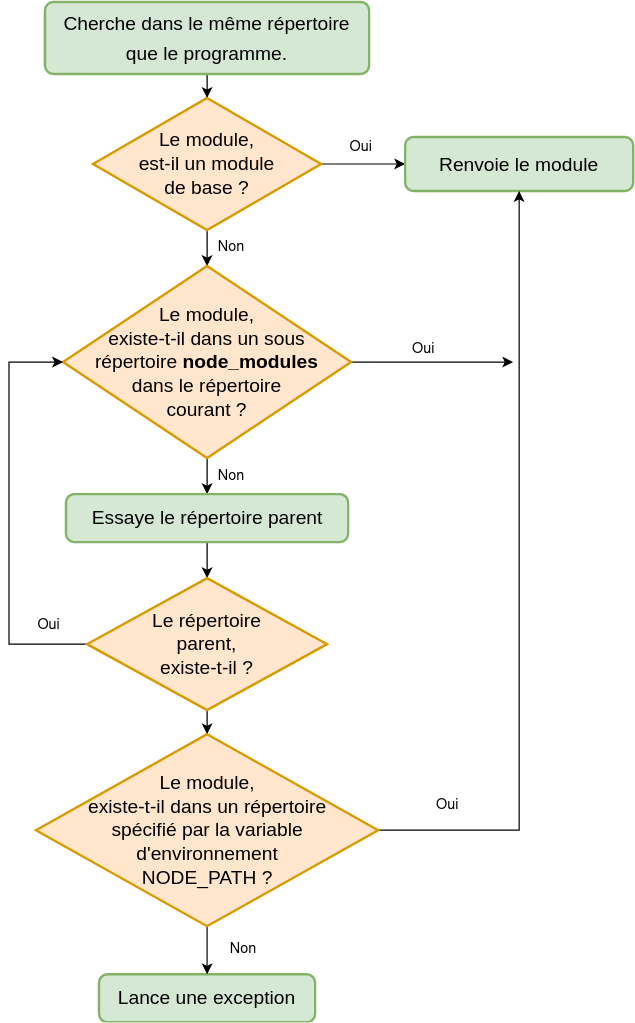

# Événements
---------------

* Une grande partie de l'API principale de Node.js est construite autour d'une architecture événementielle asynchrone idiomatique dans laquelle certains types d'objets (émetteurs) émettent des événements nommés qui provoquent l'appel d'objets type `Function` (auditeurs/écouteurs).

  - un objet `net.Server` émet un événement à chaque connection ;
  - un `fs.ReadStream` émet un événement lorsque un fichier est ouvert ;
  - un flux émet un événement chaque fois que des données sont disponibles pour être lues.

* Les objets qui émettent des événements sont des instances de la classe `EventEmitter`.
  - Ces objets exposent une fonction `eventEmitter.on()` qui permet d'attacher une ou plusieurs fonctions d'écoute à des événements nommés émis par l'objet.
  - Lorsque l'objet `EventEmitter` émet un événement, toutes les fonctions attachées à cet événement spécifique sont appelées de manière synchrone.

In [ ]:
"""Modifie le répertoire de travail de Colab"""
%cd /content/events

/content/events


### Exemples:

* L'exemple suivant montre une instance `EventEmitter` simple avec un seul écouteur.

* La méthode `eventEmitter.on()` est utilisée pour enregistrer les fonctions d'écoute, tandis que la méthode `eventEmitter.emit()` est utilisée pour déclencher l'événement.

* Il est aussi possible d'associer une fonction de rappel à un
événement donné via la méthode `eventEmitter.on()`:

In [ ]:
%%javascript --target=node --filename=events.js

const { EventEmitter } = require('node:events');

class MyEmitter extends EventEmitter {}

const myEmitter = new MyEmitter();

myEmitter.on('event', () => {
  console.log('Un événement s\'est produit !');
});

myEmitter.emit('event');

Un événement s'est produit !


* Ou via la méthode `eventEmitter.addListener()`:

In [ ]:
%%javascript --target=node --filename=addlistener.js

const { EventEmitter } = require('node:events');

class MyEmitter extends EventEmitter {}

const myEmitter = new MyEmitter();

myEmitter.addListener('event', () => {
  console.log('Un événement s\'est produit !');
});

myEmitter.emit('event');

Un événement s'est produit !


* La méthode `eventEmitter.emit()` permet de transmettre un ensemble arbitraire d'arguments aux fonctions d'écoute.

* Lorsqu'une fonction d'écoute ordinaire est appelée, la liaison `this` fait référence à l'instance d'`EventEmitter` à laquelle la fonction d'écoute est attachée.

In [ ]:
%%javascript --target=node --filename=this.js

const { EventEmitter } = require('node:events');

class MyEmitter extends EventEmitter {}

const myEmitter = new MyEmitter();

myEmitter.on('event', function(a, b) {
  console.log(a, b, this === myEmitter);
  console.dir(this);
});

myEmitter.emit('event', 'a', 'b');

a b true
MyEmitter {
_events: [Object: null prototype] { event: [Function (anonymous)] },
_eventsCount: 1,
_maxListeners: undefined,
[Symbol(kCapture)]: false
}


* Dans les fonctions d'écoute définies comme des fonctions fléchées, la liaison `this` ne fera plus référence à l'instance `EventEmitter`:

In [ ]:
%%javascript --target=node --filename=arrow.js

const EventEmitter = require('node:events');
class MyEmitter extends EventEmitter {}

const myEmitter = new MyEmitter();
myEmitter.on('event', (a, b) => {
  console.log(a, b);
  console.dir(this);
});

myEmitter.emit('event', 'a', 'b');

a b
{}


* L'objet `EventEmitter` appelle tous les fonctions d'écoute de manière synchrone dans l'ordre dans lequel elles ont été enregistrées.
  - Cela garantit le bon séquencement des événements et permet d'éviter les conditions de course et les erreurs logiques.
  
* Les fonctions d'écoute peuvent basculer vers un mode de fonctionnement asynchrone à l'aide des méthodes `setImmediate()` ou `process.nextTick()`:


In [ ]:
%%javascript --target=node --filename=asynchronous.js

const EventEmitter = require('node:events');
class MyEmitter extends EventEmitter {}

const myEmitter = new MyEmitter();
myEmitter.on('event', (a, b) => {
  setImmediate(() => {
    console.log('Cela se produit de manière asynchrone.');
  });
});

myEmitter.emit('event', 'a', 'b');

Cela se produit de manière asynchrone.


* À l'aide de la méthode `eventEmitter.once()`, il est possible d'enregistrer une fonction d'écoute appelée au plus une fois pour un événement particulier:

In [ ]:
%%javascript --target=node --filename=once.js

const EventEmitter = require('node:events');
class MyEmitter extends EventEmitter {}

const myEmitter = new MyEmitter();
let m = 0;

myEmitter.once('event', () => {
  console.log(++m);
});

myEmitter.emit('event');
myEmitter.emit('event'); // pas traité

1


* Il est possible de faire réfèrence à des événements spécifiques dans l'exécution du programme. Par exemple:
  - `exit` - émis avant qu'un processus node termine.
  - `data` - émis lorsque des données sont disponibles sur une connexion ou un fichier.
  - `end` - émis lorsqu'une connexion est fermée.

* Des événements personnalisés peuvent être définis par l'application.

* Certains modules émettent des événements (par ex., flux) et il
est possible d'inscrire des gestionnaires (*listeners*).

* Pour plus d'informations sur la gestion d'événements, consultez la documentation de [Node.js](https://nodejs.org/api/events.html).

# Activité en classe
--------

## Événements et compteur de mots

1. Complétez la fonction `registerEvents(emitter, keywords)` qui prend un flux d'événements (`emitter`) et un tableau de chaînes (`keywords`) en paramètre.
 - La fonction doit enregistrer un gestionnaire (sur le flux `emitter`) pour chaque élément de `keywords`.
 - Les fonctions gestionnaires doivent compter le nombre de fois où chacun des mots-clés sera émis dans le flux.
 - La fonction doit retourner une fonction qui imprime le nombre de répétitions de chacun des mots-clés.
 - Utilisez `emitter.on` pour surveiller le flux.

2. Écrivez du code permettant d'appeler `registerEvents` pour initialiser les gestionnaires d'événements sur le flux et obtenir la fonction qui imprime le nombre d'instances de chaque mot (fonction de retour type fermeture).
 - Comme tableau `keywords`, utilisez:
 ```javascript
["Alice", "little", "Rabbit", "Turtle", "Lobster"]
 ```

3. Par la suite, vous devez émettre chacun des mots contenus dans le fichier texte `alice_in_wonderland.txt` dans le flux.

4. Invoquez la fonction retournée par `registerEvents`.
  - Le nombre de répétitions de chacun des mots dans keywords devrait apparaître dans la console.

In [ ]:
%%javascript --target=node --filename=download_alice.js

// Exécutez ce code pour avant de travailler sur l'activité pour télécharger
// le livre "Alice in Wonderland" depuis le projet Gutenberg
const http = require('node:https');
const fs = require('node:fs');

const file = fs.createWriteStream("alice_in_wonderland.txt");
const request = http.get("https://www.gutenberg.org/files/11/11-0.txt",
    (response) => {
        response.pipe(file);
    });

* L'exercice à compléter:

<!--
function registerEvents(emitter, keywords) {
  const counts = [];
  const increment = function(index) {
    return function() {
      counts[index]++;
    }
  }

  for (let i=0; i< keywords.length; i++) {
    counts[i] = 0;
    emitter.on(keywords[i], increment(i));
  }

  return function() {
    console.log("Compteurs: ");
    for (let i=0; i<counts.length; i++) {
      console.log(`Count[${keywords[i]}] = ${counts[i]}`);
    }
  }
};
-->

In [ ]:
%%javascript --target=node --filename=word_count.js

const fs = require('node:fs');
const EventEmitter = require('node:events');

function registerEvents(emitter, keyworks) {
  // Completez le code de cette fonction...
  const counts = [];
  const increment = function(index) {
    return function() {
      counts[index]++;
    }
  }

  for (let i=0; i< keywords.length; i++) {
    counts[i] = 0;
    emitter.on(keywords[i], increment(i));
  }

  return function() {
    console.log("Compteurs: ");
    for (let i=0; i < counts.length; i++) {
      console.log(`Count[${keywords[i]}] = ${counts[i]}`);
    }
  }
}

const eventEmitter = new EventEmitter();

// Lit le contenu du fichier et définit les gestionnaires pour analyser les mots
const text = fs.readFileSync("alice_in_wonderland.txt").toString();
// console.log(text.length);
const keywords = ["Alice", "little", "Rabbit", "Turtle", "Lobster"];
const printCounts = registerEvents(eventEmitter, keywords);

const words = text.split(" ");
words.forEach( word => {
    eventEmitter.emit(word.trim());
});

printCounts();

Compteurs:
Count[Alice] = 156
Count[little] = 94
Count[Rabbit] = 27
Count[Turtle] = 29
Count[Lobster] = 3


# Des fichiers
-----------------

* Node.js supporte deux façons d'écrire et de lire des fichiers:
  - Lectures et écritures asynchrones.
  - Lectures et écritures synchrones (similaire aux autres langages).
* Les accès asynchrones nécessitent d'une fonction de rappel, ou l'usage de l'API basée sur les promesses.

In [ ]:
"""Modifie le répertoire de travail de Colab"""
%cd /content/files

/content/files


In [ ]:
%%javascript --target=node --filename=download_book.js

/* Pour télécharger le livre Alice in Wonderland */
const http = require('node:https');
const fs = require('node:fs');

const file = fs.createWriteStream("alice_in_wonderland.txt");
const request = http.get("https://www.gutenberg.org/files/11/11-0.txt",
    (response) => {
        response.pipe(file);
    });

In [ ]:
!ls -l

total 176
-rw-r--r-- 1 root root 174313 Oct 30 23:37 alice_in_wonderland.txt
-rw-r--r-- 1 root root    314 Oct 30 23:37 download_book.js


## Les descripteurs de fichiers

* Un descripteur de fichier (`fd`) est une référence à un fichier ouvert.
  - `fd` est un nombre renvoyé en ouvrant le fichier à l'aide de la méthode `open()` proposée par le module `fs`.
  - `fd` identifie de manière unique un fichier ouvert dans le système d'exploitation :

In [ ]:
%%javascript --target=node --filename=open_async.js

const fs = require('node:fs');

fs.open('alice_in_wonderland.txt', 'r', (err, fd) => {

  // fd est le descripteur de fichier
  console.log(`Erreur: ${err}, descripteur: ${fd}`);
})

Erreur: null, descripteur: 17


* Le `r` utilisé comme deuxième paramètre de `fs.open()` signifie ouvrir le fichier en mode lecture.
* D'autres valeurs possibles:
  - `r+` - ouvre le fichier en lecture et en écriture.
  - `w+` - ouvre le fichier en lecture et en écriture.
  - `a` - ouvrir le fichier en écriture en positionnant le flux en fin de fichier.
  - `a+` - ouvre le fichier en lecture et en écriture, en positionnant le flux à la fin du fichier.

* Pour ouvrir le fichier de façon synchrone:

In [ ]:
%%javascript --target=node --filename=open_sync.js

const fs = require('node:fs');

try {
  const fd = fs.openSync('alice_in_wonderland.txt', 'r');
  console.log(`Descripteur: ${fd}`);
} catch (err) {
  console.error(err);
}

Descripteur: 17


## Statistiques de fichier

* La méthode `fs.stat()` permet d'obtenir des statistiques sur un fichier.

In [ ]:
%%javascript --target=node --filename=file_stats.js

const fs = require('node:fs');

fs.stat('alice_in_wonderland.txt', (err, stats) => {
  if (err) {
    console.error(err);
    return;
  }

  console.log('isFile: ' + stats.isFile());
  console.log('isDirectory: ' + stats.isDirectory());
  console.log('isSymbolicLink: ' + stats.isSymbolicLink());
  console.log('size: ' + stats.size);
})

isFile: true
isDirectory: false
isSymbolicLink: false
size: 174313


## Chemins de fichiers

* Étant donné un chemin, on peut extraire des informations en utilisant ces méthodes:
  - `dirname` - récupère le dossier parent d'un fichier
  - `basename` - récupère la partie du nom de fichier
  - `extname` - récupère l'extension du fichier


In [ ]:
%%javascript --target=node --filename=path_methods.js

const path = require('node:path');

const filename = '/content/files/alice_in_wonderland.txt';

console.log(path.dirname(filename));
console.log(path.basename(filename));
console.log(path.extname(filename));

/content/files
alice_in_wonderland.txt
.txt


## Lecture de fichiers

* La méthode `fs.readFile()`, utilisée pour lire un fichier, reçoit comme arguments:
  - le chemin du fichier
  - l'encodage
  - une fonction de rappel qui sera appelée avec les données du fichier (et l'erreur elle même).

In [ ]:
%%javascript --target=node --filename=file_read_async.js

const fs = require('node:fs');

fs.readFile('alice_in_wonderland.txt', 'utf8' , (err, data) => {
  if (err) {
    console.error(err);
    return
  }
  console.log(data.substring(0, 300));
})

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll
This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the term


* Version ES avec l'API basée sur les promesses :

In [ ]:
%%javascript --target=node --filename=file_read_promises.mjs

import fs from "node:fs/promises";

let fd;
try {
  fd = await fs.open('alice_in_wonderland.txt', 'r');
  const stream = fd.createReadStream({ start: 0, end: 300, encoding: 'utf-8' });
  for await (const chunk of stream) {
    console.log(chunk);
  }
} catch (error) {
    console.log(`Erreur: ${error}`);
} finally {
  await fd?.close();
}

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll
This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the t


* La version synchrone `fs.readFileSync()`:

In [ ]:
%%javascript --target=node --filename=file_read_sync.js

const fs = require('node:fs');

try {
  const data = fs.readFileSync('alice_in_wonderland.txt', 'utf8')
  console.log(data.substring(0, 300));
} catch (err) {
  console.error(err);
}

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll
This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the term


## Écriture de fichiers

* La méthode `fs.writeFile()` peut être utilisé pour écrire dans un fichier:

In [ ]:
%%javascript --target=node --filename=file_write_async.js

const fs = require('node:fs');

const content = 'Neque porro quisquam est qui dolorem \n' +
                'ipsum quia dolor sit amet, consectetur, adipisci velit...';

fs.writeFile('fichier.txt', content, err => {
  if (err) {
    console.error(err);
    return;
  }
});

In [ ]:
!cat fichier.txt

Neque porro quisquam est qui dolorem 
ipsum quia dolor sit amet, consectetur, adipisci velit...

* Version à l'aide des promesses :

In [ ]:
%%javascript --target=node --filename=file_write_promises.mjs

import { writeFile } from "node:fs/promises";

const content = 'Neque porro quisquam est qui dolorem \n' +
                'ipsum quia dolor sit amet, consectetur, adipisci velit...';

try {
    const promise = writeFile('fichier.txt', content);
    await promise;
} catch (error) {
    console.log(`Erreur: ${error}`);
}

* Et la version synchrone avec `fs.writeFileSync()`:

In [ ]:
%%javascript --target=node --filename=file_write_sync.js

const fs = require('node:fs');

const content = 'Neque porro quisquam est qui dolorem \n' +
                'ipsum quia dolor sit amet, consectetur, adipisci velit...';

try {
  fs.writeFileSync('fichier.txt', content)
} catch (err) {
  console.error(err)
}

# Flux de données
----------

* Les flux de données permettent de gérer efficacement les fichiers en mode lecture/écriture, les communications réseau ou tout type d'échange d'informations de bout en bout.

* Les flux ont été introduits dans le système d'exploitation Unix où les programmes peuvent interagir les uns avec les autres en passant des flux via l'opérateur pipe (`|`).

* Avec des flux, on lit un fichier morceau par morceau, en traitant son contenu sans tout garder en mémoire.

  - Le module `stream` de Node.js fournit la base pour toutes les API de streaming.

  - Tous les flux sont des instances d'`EventEmitter`.

### Avantages des flux :

* **Efficacité mémoire** : pas besoin de charger de grandes quantités de données en mémoire avant de pouvoir les traiter.

* **Efficacité temporelle** : il faut beaucoup moins de temps pour commencer à traiter les données. Le traitement des données peut commencer dès qu'on les a, plutôt que d'attendre que toutes les données soient disponibles.

## Manipulation des fichiers en mode flux

* Il est possible d'entâmer le traitement des données lues d'un fichier pendant sa lecture (utile pour les fichiers de grande taille).

* Pour ce faire, on doit ouvrir le fichier en mode flux (stream).

* Trois types d'événements seront générés:
  - `data`: Des données lues sont disponibles.
  - `end`: La fin du fichier a été atteinte.
  - `error`: Il y a eu une erreur dans la lecture des données.

In [ ]:
%%javascript --target=node --filename=file_stream_read.js

// Compter le nombre total de caractères dans un fichier texte donné
const fs = require('node:fs');

let length = 0;
const filename = "alice_in_wonderland.txt";
const readStream = fs.createReadStream(filename, {encoding: 'utf8'});

readStream.on("data", function (blob) {
    console.log("Caractères lus: " + blob.length);
    length += blob.length;
});

readStream.on("end", function () {
    console.log("Nombre total de caractères lus: " + length);
});

readStream.on("error", function () {
    console.log("Une erreur est survenue lors de la lecture du fichier: " + filename);
});

console.log("Fin du programme");

Fin du programme
Caractères lus: 63363
Caractères lus: 62284
Caractères lus: 42161
Nombre total de caractères lus: 167808


* Voici ci-dessous une version `async/await`:

In [ ]:
%%javascript --target=node --filename=file_stream_read_await.js

const fs = require('node:fs');
const filename = "alice_in_wonderland.txt";

async function readChunks(readable) {
  let length = 0;
  for await (const chunk of readable) {
    console.log("Caractères lus: " + chunk.length);
    length += chunk.length;
  }
  return length;
}

const readStream = fs.createReadStream(filename, {encoding: 'utf8'});
readChunks(readStream).then(length => {
  console.log("Nombre total de caractères lus: " + length);
});

Caractères lus: 63363
Caractères lus: 62284
Caractères lus: 42161
Nombre total de caractères lus: 167808


* Tout comme `readStream()`, il est possible de créer des flux d'écriture (`writeStream`) et y écrire des données en blocs (blobs)
  - Les mêmes événements sont pris en charge: `data`, `end`, `error`.
  - Utile lorsque combiné avec des flux de lecture pour réduire la mise en mémoire tampon (buffering).
  - Nécessaire d'appeler `end()` quand l'écriture est terminée.

In [ ]:
%%javascript --target=node --filename=file_stream_copy.js

const fs = require("node:fs");

const filename1 = "alice_in_wonderland.txt";
const filename2 = "alice_in_wonderland_copy.txt";

const readStream = fs.createReadStream(filename1);
const writeStream = fs.createWriteStream(filename2);

readStream.on("data", function (blob) {
    console.log("Caractères lus: " + blob.length);
    writeStream.write(blob);
});

readStream.on("end", function () {
    console.log("Fin du flux");
    writeStream.end();
});

Caractères lus: 65536
Caractères lus: 65536
Caractères lus: 43241
Fin du flux


In [ ]:
!ls -l *.txt

-rw-r--r-- 1 root root 174313 Oct 30 23:54 alice_in_wonderland_copy.txt
-rw-r--r-- 1 root root 174313 Oct 30 23:55 alice_in_wonderland_pipe.txt
-rw-r--r-- 1 root root 174313 Oct 30 23:37 alice_in_wonderland.txt
-rw-r--r-- 1 root root     95 Oct 30 23:46 fichier.txt


* Exemple au moyen de tuyaux (`pipe`):

In [ ]:
%%javascript --target=node --filename=file_stream_pipe.js

const fs = require("node:fs");

const filename1 = "alice_in_wonderland.txt";
const filename2 = "alice_in_wonderland_pipe.txt";

const readStream = fs.createReadStream(filename1);
const writeStream = fs.createWriteStream(filename2);

readStream.pipe(writeStream);

* Ce code prend la source et la dirige vers une destination.
* On appelle `pipe()` sur le flux source, qui est redirigé vers un autre flux.
* La valeur de retour de la méthode `pipe()` est le flux de destination, ce qui est très pratique et permet d'enchaîner plusieurs appels `pipe()`.


* Version qui utilise `pipeline` de l'API des promesses :

In [ ]:
%%javascript --target=node --filename=file_write_promises.js

const { pipeline } = require('node:stream/promises');
const fs = require('node:fs');

async function run() {
  await pipeline(
    fs.createReadStream('alice_in_wonderland.txt'),
    fs.createWriteStream('alice_in_wonderland_copy.txt'),
  );
  console.log('Pipeline finalisée.');
}

run().catch(console.error);

Pipeline finalisée.


* Exemple d'usage de tuyau pour rediriger le flux de lecture d'un fichier ver le flux d'une réponse HTTP :

In [ ]:
%%javascript --target=node --filename=server_file.js --port=3000

const http = require('node:http');
const fs = require('node:fs');

const port = process.env.NODE_PORT || 3000;

const server = http.createServer((req, res) => {
  const stream = fs.createReadStream('alice_in_wonderland.txt');
  stream.pipe(res);
})

server.listen(port);

In [ ]:
!curl -s http://localhost:3000 | head -n 20

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8


## Transformations des flux

* Pour créer des transformations des flux, nous utilisons `Transform` du module `stream` et nous implémentons la méthode `_transform()`.

* Exemple:

In [ ]:
%%javascript --target=node --filename=stream_transform.js --port=3000

const http = require('node:http');
const fs = require('node:fs');

const port = process.env.NODE_PORT || 3000;

const { Transform } = require('stream');
const transformStream = new Transform();

transformStream._transform = (chunk, encoding, callback) => {
  transformStream.push(chunk.toString().toUpperCase());
  callback();
};

const server = http.createServer((req, res) => {
  const stream = fs.createReadStream('alice_in_wonderland.txt');
  stream.pipe(transformStream).pipe(res);
});

server.listen(port);

In [ ]:
!curl -s http://localhost:3000 | head -n 20

﻿THE PROJECT GUTENBERG EBOOK OF ALICE’S ADVENTURES IN WONDERLAND, BY LEWIS CARROLL

THIS EBOOK IS FOR THE USE OF ANYONE ANYWHERE IN THE UNITED STATES AND
MOST OTHER PARTS OF THE WORLD AT NO COST AND WITH ALMOST NO RESTRICTIONS
WHATSOEVER. YOU MAY COPY IT, GIVE IT AWAY OR RE-USE IT UNDER THE TERMS
OF THE PROJECT GUTENBERG LICENSE INCLUDED WITH THIS EBOOK OR ONLINE AT
WWW.GUTENBERG.ORG. IF YOU ARE NOT LOCATED IN THE UNITED STATES, YOU
WILL HAVE TO CHECK THE LAWS OF THE COUNTRY WHERE YOU ARE LOCATED BEFORE
USING THIS EBOOK.

TITLE: ALICE’S ADVENTURES IN WONDERLAND

AUTHOR: LEWIS CARROLL

RELEASE DATE: JANUARY, 1991 [EBOOK #11]
[MOST RECENTLY UPDATED: OCTOBER 12, 2020]

LANGUAGE: ENGLISH

CHARACTER SET ENCODING: UTF-8


# Activité en classe
--------------

## Rechercher une chaîne dans un flux de données

* Complétez le code ci-dessous pour rechercher une chaîne dans
un très grand fichier texte. Le fichier devrait être lu de manière
asynchrone au moyen des flux, et **ne devrait pas être mis en
mémoire tampon en entier** puisqu'il peut être potentiellement
trop grand.

* De plus, si la chaîne est trouvée en début du fichier, il serait
futile de chercher tout le restant du fichier si cela n'est pas
requis.

**Notes**:
* Votre fonction de réception des données sera peut-être invoquée plusieurs fois.
* Vous devez être en mesure de chercher la chaîne voulue entre deux blocs consécutifs.

<!--
let oldBloc = "";
let index = -1;

readStream.on("data", bloc => {
  console.log("# caractères lus: " + bloc.length);
  let newBloc = oldBloc + bloc;
  index = newBloc.indexOf(textToFind);
  if (index >= 0) {
    readStream.emit("end");
  }
  oldBloc = bloc;
});

readStream.on("end", () => {
  if (index >= 0) {
    console.log("Chaine trouvée: " + textToFind);
  } else {
    console.log("Chaine introuvable: " + textToFind);
  }
});

readStream.on("error", () => {
  console.log("Erreur de lecture: " + filename);
});
-->

In [ ]:
%%javascript --target=node  --filename=string_finder.js

const fs = require('node:fs');
const filename = __dirname + '/alice_in_wonderland.txt';
const textToFind = "large rose-tree stood";
//const textToFind = "Alice";
const readStream = fs.createReadStream(filename);

let oldBloc = "";
let index = -1;

// Completez le code...

readStream.on("data", bloc => {
  console.log("# caractères lus: " + bloc.length);
  let newBloc = oldBloc + bloc;
  index = newBloc.indexOf(textToFind);
  if (index >= 0) {
    readStream.emit("end");
  }
  oldBloc = bloc;
});

readStream.on("end", () => {
  if (index >= 0) {
    console.log("Chaine trouvée: " + textToFind);
  } else {
    console.log("Chaine introuvable: " + textToFind);
  }
});

readStream.on("error", () => {
  console.log("Erreur de lecture: " + filename);
});

# caractères lus: 65536
# caractères lus: 65536
Chaine trouvée: large rose-tree stood
# caractères lus: 43241
Chaine trouvée: large rose-tree stood
Chaine trouvée: large rose-tree stood


# Serveur HTTP
--------------------

* Node.js possède des modules spécifiques pour gérer des connexions réseau et lancer des serveurs au moyen de différents protocoles.
  - `net`: module pour créer des serveurs génériques.
  - `http`: serveurs HTTP.
* Pour créer un serveur http:
  - `createServer((req, resp))`: la fonction est invoquée lorsqu'une requête arrive, avec deux paramètres:
    - la requête (`req`) et la réponse (`res`).
  - `listen`: écouter sur un port donné et commencer à recevoir les
requêtes.


In [ ]:
"""Modifie le répertoire de travail de Colab"""
%cd /content/http

/content/http


In [ ]:
%%javascript --target=node --filename=http_server.js --port=3000

const http = require('node:http');

const hostname = 'localhost';
const port = process.env.NODE_PORT || 3000;

const server = http.createServer((req, res) => {
    res.statusCode = 200;
    res.setHeader('Content-Type', 'text/plain');
    res.end('Salut tout le monde!\n');
})

server.listen(port, hostname, () => {
    console.log(`Serveur démarré à l'adresse http://${hostname}:${port}/`);
})

Serveur démarré à l'adresse http://localhost:3000/


In [ ]:
!curl http://localhost:3000

Salut tout le monde!


* **La requête et la réponse reçues par la fonction fléchée sont des flux.**

* Possible d'ajouter des gestionnaires sur la requête et la réponse comme on peut le faire pour les flux.
  - Appeler la méthode `end` sur la réponse lorsque la transmission
du contenu est terminée.

* Possible de récupérer les en-têtes et l'URL de la requête
  - `request.url`
  - `request.headers` (paires de clés-valeurs)

On peut créer des requêtes HTTP/S GET avec les modules standard de Node.js :

In [ ]:
%%javascript --target=node --filename=https_get.js

const http = require('node:http');

const options = {
  hostname: 'localhost',
  port: 3000,
  path: '/',
  method: 'GET'
}

const req = http.request(options, res => {
  console.log(`statusCode: ${res.statusCode}`)

  res.on('data', d => {
    process.stdout.write(d);
  })
})

req.on('error', error => {
  console.error(error);
})

req.end();

statusCode: 200
Salut tout le monde!


# Activité en classe
---------

## Serveur HTTP

* Dans cette activité vous devez utiliser les modules de base de Node.js pour implémenter un serveur HTTP qui accepte des requêtes HTTP GET pour accéder le chemin (ressource) `/movies`.  
* Lorsque le serveur reçoit une requête pour `/movies`, il doit lire un fichier `.csv` (comma-separated values), qui contient quelques informations sur des films inspirés de jeux vidéo.
* La première ligne du fichier `.csv` qui vous sera fourni en entrée, contient les noms des colonnes. La réponse HTTP doit contenir un tableau d'objets JSON. Chaque ligne du fichier .csv doit être convertie en objet JSON dont les noms des propriétés sont les noms des colonnes. Par exemple:
* La ligne suivante du fichier .csv:
```
1,Super Mario Bros.,1993-05-28,38912465.00,Buena Vista Pictures Distribution,Nintendo
```

* Doit être convertie en:
```
{
    "id": 1,
    "title": "Super Mario Bros.",
    "release_date": "1993-05-28",
    "box_office": 38912465,
    "distributor": "Buena Vista Pictures Distribution",
    "game_publisher": "Nintendo"
}
```

* Une requête HTTP pour un chemin différent de `/movies` doit recevoir une réponse `404 Not Found`.
* Pour tester votre implémentation, vous pouvez utiliser l'adresse générée par la commande `%%javascript`, ou le code HTML qui suit la cellule d'implémentation du serveur. La page HTML affichera un tableau HTML avec les films.

<!--
const http = require('http');
const fs = require('fs');
const { Transform } = require('stream');

const hostname = 'localhost';
const port = process.env.NODE_PORT || 3000;
const dataset = 'video_game_films.csv';

class ToJson extends Transform {
    constructor() {
        super();
        this.firstChunk = true;
        this.fieldNames = null;
    }

    _transform(chunk, encoding, callback) {
        let lines = chunk.toString().split('\n');
        if (this.firstChunk) {
            this.fieldNames = lines.shift().trim().split(',');
            this.firstChunk = false;
        }

        let objs = [];
        lines.forEach(line => {
            let values = line.trim().split(',');
            let obj = {};
            values.forEach((value, index) => {
                obj[this.fieldNames[index]] = value;
            });
            objs.push(obj);
        });

        callback(null, JSON.stringify(objs));
    }
}

const server = http.createServer((req, res) => {
    if (req.url.startsWith("/movies")) {
        const headers = {
            "Content-Type": "application/json",
            "Access-Control-Allow-Origin": "*",
            "Access-Control-Allow-Methods": "OPTIONS, POST, GET"
        };

        res.writeHead(200, headers);
        const stream = fs.createReadStream(dataset);
        stream.pipe(new ToJson()).pipe(res);
    } else {
        res.statusCode = 404;
        res.setHeader("Content-Type", "text/plain");
        res.end("Introuvable");
    }
})

server.listen(port, hostname, () => {
    console.log(`Serveur démarré à l'adresse http://${hostname}:${port}/`);
});
-->

In [ ]:
# Commande pour télécharger le fichier .csv
!wget https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/cours07-node-js/exercises/http_server/data/video_game_films.csv

--2023-11-06 23:27:19--  https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/cours07-node-js/exercises/http_server/data/video_game_films.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334 (3.3K) [text/plain]
Saving to: ‘video_game_films.csv’

video_game_films.cs 100%[===================>]   3.26K  --.-KB/s    in 0s      

2023-11-06 23:27:19 (53.0 MB/s) - ‘video_game_films.csv’ saved [3334/3334]



In [ ]:
!head video_game_films.csv

id,title,release_date,box_office,distributor,game_publisher
1,Super Mario Bros.,1993-05-28,38912465.00,Buena Vista Pictures Distribution,Nintendo
2,Double Dragon,1994-11-04,4152699.00,Gramercy Pictures,Technos Japan
3,Street Fighter,1994-12-23,99423521.00,Universal Pictures,Capcom
4,Mortal Kombat,1995-08-18,124741822.00,New Line Cinema,Midway
5,Mortal Kombat: Annihilation,1997-11-21,51376861.00,New Line Cinema,Midway
6,Wing Commander,1999-03-12,11578059.00,20th Century Fox,Origin Systems
7,Lara Croft: Tomb Raider,2001-06-15,274703340.00,Paramount Pictures,Eidos
8,Resident Evil,2002-03-15,102984862.00,Sony Pictures Releasing,Capcom
9,Lara Croft: Tomb Raider – The Cradle of Life,2003-07-25,156505388.00,Paramount Pictures,Eidos


In [ ]:
%%javascript --target=node --filename=movie_server.js --port=3000

const http = require('node:http');
const fs = require('node:fs');
const { Transform } = require('stream');

const hostname = 'localhost';
const port = process.env.NODE_PORT || 3000;
const dataset = 'video_game_films.csv';

// Completez le code...

class ToJson extends Transform {
    constructor() {
        super();
        this.firstChunk = true;
        this.fieldNames = null;
    }

    _transform(chunk, encoding, callback) {
        let lines = chunk.toString().split('\n');
        if (this.firstChunk) {
            this.fieldNames = lines.shift().trim().split(',');
            this.firstChunk = false;
        }

        let objs = [];
        lines.forEach(line => {
            let values = line.trim().split(',');
            let obj = {};
            values.forEach((value, index) => {
                obj[this.fieldNames[index]] = value;
            });
            objs.push(obj);
        });

        callback(null, JSON.stringify(objs));
    }
}

const server = http.createServer((req, res) => {
    if (req.url.startsWith("/movies")) {
        const headers = {
            "Content-Type": "application/json",
            "Access-Control-Allow-Origin": "*",
            "Access-Control-Allow-Methods": "OPTIONS, POST, GET"
        };

        res.writeHead(200, headers);
        const stream = fs.createReadStream(dataset);
        stream.pipe(new ToJson()).pipe(res);
    } else {
        res.statusCode = 404;
        res.setHeader("Content-Type", "text/plain");
        res.end("Introuvable");
    }
})

server.listen(port, hostname, () => {
    console.log(`Serveur démarré à l'adresse http://${hostname}:${port}/`);
});

Serveur démarré à l'adresse http://localhost:3000/


In [ ]:
!curl -s http://localhost:3000/movies | json_pp

[
   {
      "box_office" : "38912465.00",
      "distributor" : "Buena Vista Pictures Distribution",
      "game_publisher" : "Nintendo",
      "id" : "1",
      "release_date" : "1993-05-28",
      "title" : "Super Mario Bros."
   },
   {
      "box_office" : "4152699.00",
      "distributor" : "Gramercy Pictures",
      "game_publisher" : "Technos Japan",
      "id" : "2",
      "release_date" : "1994-11-04",
      "title" : "Double Dragon"
   },
   {
      "box_office" : "99423521.00",
      "distributor" : "Universal Pictures",
      "game_publisher" : "Capcom",
      "id" : "3",
      "release_date" : "1994-12-23",
      "title" : "Street Fighter"
   },
   {
      "box_office" : "124741822.00",
      "distributor" : "New Line Cinema",
      "game_publisher" : "Midway",
      "id" : "4",
      "release_date" : "1995-08-18",
      "title" : "Mortal Kombat"
   },
   {
      "box_office" : "51376861.00",
      "distributor" : "New Line Cinema",
      "game_publisher" : "Midway",
    

* Page pour tester votre implémentation:

In [ ]:
%%html

<style>
  body { font-family: Helvetica; }
  td { padding: 2px 5px; }
  th { background-color: lightgrey; padding: 4px 5px; }
</style>

<h1>Liste des films inspirés des jeux vidéo</h1>
<div id="content"></div>
<script>

    // Pour construire le tableau avec les résultats
    function buildTable(data, fields) {
        let table = document.createElement("table");

        // Crée l'en-tête du tableau
        let header = document.createElement("tr");
        Object.keys(fields).forEach((field) => {
            let cell = document.createElement("th");
            cell.appendChild(document.createTextNode(fields[field]));
            header.appendChild(cell);
        });
        table.appendChild(header);

        // Crée les lignes du tableau
        data.forEach((object) => {
            let row = document.createElement("tr");
            Object.keys(fields).forEach((field) => {
                let cell = document.createElement("td");
                cell.appendChild(document.createTextNode(object[field]));
                if (field == "box_office") { cell.style.textAlign = "right"; }
                row.appendChild(cell);
            });
            table.appendChild(row);
        });
        return table;
    }

    function checkResponse(response) {
        if (!response.ok)
            throw Error(`${response.status} - ${response.statusText}`);
        return response;
    }

    const FIELDS = {
        "title": "Nom",
        "release_date": "Date",
        "box_office": "Billetterie en dolar",
        "distributor": "Distributeur",
        "game_publisher": "Developpeur"
    };

    const url = 'http://localhost:3000/movies';

    fetch(url)
        .then(checkResponse)
        .then(response => response.json())
        .then(data => {
            let table = buildTable(data, FIELDS);
            document.getElementById("content").appendChild(table);
        })
        .catch(error => document.getElementById("content").innerHTML = error.message);

</script>

# Express
-------------

* Express est un intergiciel de développement d'applications web en Node.js.
* Il est à un niveau d'abstraction plus élevé que les APIs standards de serveur HTTP, mais est à un niveau assez général afin d'être utilisable pour une variété d'applications dorsales et d'APIs web.

## Limitation des APIs HTTP de base

* Les APIs de base Node.js pour à créer un serveur HTTP sont à un niveau plus bas que celui de plusieurs autres intergiciels.
  - Il est nécessaire de traiter manuellement l'URL de la requête.
  - Peu de flexibilité et nécessité de "réinventer la roue" à chaque fois.
  - Ouvre la porte à des vulnérabilités de sécurité.
  - Difficile de gérer les paramètres.

* Plusieurs intergiciels proposent un plus haut niveau d'abstraction ([Fastify](https://www.fastify.io/), [Hapi](https://hapi.dev/), [Express](https://expressjs.com), [Connect](https://github.com/senchalabs/connect)).

* Nous allons seulement regarder un aperçu d'Express

## Fonctionnalités d'Express

* **Routage:** exécution d'un gestionnaire pour une URL et méthode données.

* **Middleware:** déclencher un comportement spécifique pour des requêtes/méthodes correspondant à certains critères.
  - Par ex., logging, validation des cookies, authentification
  - Implémentation d'un pré-traitement spécifique avant le traitement de la requête individuelle.

* **Engin de modèles (templates):** possibilité de définir des ressources statiques contenant des variables qui peuvent être remplacées dynamiquement et servies en réponse (par ex., HTML).

* **Gestion des erreurs** de manière centralisée.

* **Connexion à différentes bases de données.**

In [ ]:
"""Modifie le répertoire de travail de Colab"""
%cd /content/express

/content/express


* Pour installer Express.js:

In [ ]:
!npm install express


added 62 packages in 2s

11 packages are looking for funding
  run `npm fund` for details


In [ ]:
%%javascript --target=node --filename=hello.js --port=3000

const express = require('express');
const app = express();
const port = process.env.NODE_ENV || 3000;

app.get('/', (req, res) => {
  res.send('Salut tout le monde!');
});

app.listen(port, () => {
  console.log(`Exemple d'application écoutant sur le port ${port}`);
});

Exemple d'application écoutant sur le port 3000


In [ ]:
!curl -s http://localhost:3000

Salut tout le monde!

In [ ]:
!curl -s -I http://localhost:3000/autre_page.html

HTTP/1.1 404 Not Found
X-Powered-By: Express
Content-Security-Policy: default-src 'none'
X-Content-Type-Options: nosniff
Content-Type: text/html; charset=utf-8
Content-Length: 155
Date: Tue, 31 Oct 2023 00:10:31 GMT
Connection: keep-alive
Keep-Alive: timeout=5



* L'application démarre un serveur qui attend des connexions au port `3000`.

* L'application répond par "Salut tout le monde!" pour les requêtes à l'URL racine (`/`).

* Pour tous les autres chemins, il répondra par un `404 Not Found`.

## Routage

Le routage détermine comment une application répond à une demande client à un point de terminaison (*endpoint*), qui est un URI (ou chemin) et une méthode de demande HTTP spécifique (`GET` , `POST`, etc.). Chaque route peut avoir un ou plusieurs gestionnaires.

La définition de route prend la structure suivante :
```javascript
app.METHOD(PATH, HANDLER)
```

* `app` est une instance d'Express.
* `METHOD` est une méthode de requête HTTP en minuscules (par ex., `get`, `post`).
* `PATH` est un chemin sur le serveur.
* `HANDLER` est la fonction exécutée lorsque la route correspond.

**Examples:**

```javascript
app.get('/', (req, res) => {
  res.send('Salut tout le monde!')
})

app.post('/movies', (req, res) => {
  res.send('Demande POST pour /movies reçue')
})

app.put('/movies/:movieId', (req, res) => {
  res.send('Demande PUT pour /movies reçue')
})

app.delete('/movies/:movieId', (req, res) => {
  res.send('Demande DELETE pour /movies reçue')
})
```

### Enregistrer plusieurs fonctions de rappel

Les méthodes de routage peuvent avoir plus d'une fonction de rappel (`callback`) comme arguments.

Avec plusieurs fonctions de rappel, il faut fournir `next` comme argument à la fonction de rappel, puis d'appeler `next()` dans le corps de la fonction pour transférer le contrôle au `callback` suivant.

**Exemples :**

```javascript
const callback1 = function (req, res, next) {
  console.log('callback1')
  next()
}

const callback2 = function (req, res, next) {
  console.log('callback2')
  next()
}

const callback3 = function (req, res) {
  res.send('callback3')
}

app.get('/example/a', [callback1, callback2, callback3])
```

```javascript
const callback1 = function (req, res, next) {
  console.log('callback1')
  next()
}

const callback2 = function (req, res, next) {
  console.log('callback2')
  next()
}

app.get('/example/b', [callback1, callback2], (req, res, next) => {
  console.log('La réponse sera envoyée par la fonction suivante...')
  next()
}, (req, res) => {
  res.send('Salut depuis la dernière...!')
})
```

### Chemins de routage

Il est possible d'associer des jetons ou expressions régulières aux points de terminaison:

* `app.get('/random.text', (req, res))` : /random.text.
* `app.get('/ab?cd', (req, res))` : acd et abcd.
* `app.get('/ab+cd', (req, res))` : abcd, abbcd, abbbcd, etc.
* `app.get('/ab*cd', (req, res))` : abcd, abxcd, abRANDOMcd, ab123cd, etc.
* `app.get('/ab(cd)?e', (req, res))` : /abe et /abcde.
* `app.get(/.*fly$/, (req, res))` : butterfly et dragonfly, mais pas butterflyman, dragonflyman, etc.

### Paramètres

Les paramètres de routage sont des segments d'URL nommés et utilisés pour capturer les valeurs spécifiées à leur position dans l'URL. Les valeurs capturées sont renseignées dans l'objet `req.params`, avec le nom du paramètre spécifié dans le chemin et leurs clés respectives.

**Exemple :**

```javascript
app.get('/users/:userId/books/:bookId', (req, res) => {
  console.log(req.params.userId);
  res.send(req.params);
})
```

```
Chemin: /users/:userId/books/:bookId
URL de la requête: http://localhost:3000/users/34/books/8989
req.params: { "userId": "34", "bookId": "8989" }
```

**D'autres exemples:**

```
Chemin: /flights/:from-:to
URL de la requête: http://localhost:3000/flights/LAX-SFO
req.params: { "from": "LAX", "to": "SFO" }

Chemin: /plantae/:genus.:species
URL de la requête: http://localhost:3000/plantae/Prunus.persica
req.params: { "genus": "Prunus", "species": "persica" }

Chemin: /user/:userId(\d+)
URL de la requête: http://localhost:3000/user/42
req.params: {"userId": "42"}
```

## Paramètres de requête (*query parameters*)

Pour utiliser les paramètres de requête (*query parameters*) dans Express, vous pouvez utiliser l'objet `req.query`. Les paramètres de requête sont généralement inclus dans l'URL après le point d'interrogation (`?`) et sont séparés par des ampersands (`&`).

Par exemple, si votre URL comprend une chaîne de requête comme `?param1=valeur1&param2=valeur2`, vous pouvez accéder à ces paramètres de la manière suivante :

In [ ]:
%%javascript --target=node --filename=query_parameters.js --port=3000

const express = require('express');
const app = express();
const port = process.env.NODE_ENV || 3000;

app.get('/exemple', (req, res) => {
  const param1 = req.query.param1;
  const param2 = req.query.param2;

  res.send(`param1 : ${param1}, param2 : ${param2}`);
});

app.listen(port, () => {
  console.log(`Serveur en cours d'exécution sur le port ${port}`);
});

Serveur en cours d'exécution sur le port 3000


In [ ]:
!curl "http://localhost:3000/exemple?param1=GTI&param2=525"

param1 : GTI, param2 : 525

### Méthodes de réponse

Les méthodes de l'objet de réponse (`res`) dans le tableau suivant peuvent envoyer une réponse au client et terminer le cycle requête-réponse.

| Méthode | Description |
|-----|-------|
| [res.download()](https://expressjs.com/en/4x/api.html#res.download) |	Demande le téléchargement d'un fichier. |
| [res.end()](https://expressjs.com/en/4x/api.html#res.end) |	Finaliser la réponse. |
| [res.json()](https://expressjs.com/en/4x/api.html#res.json) |	Réponse JSON explicite. |
| [res.jsonp()](https://expressjs.com/en/4x/api.html#res.jsonp) | réponse JSON avec support JSONP. |
| [res.redirect()](https://expressjs.com/en/4x/api.html#res.redirect) |	Rediriger vers une autre URL |
| [res.render()](https://expressjs.com/en/4x/api.html#res.render) |	Effectuer le rendu d'une page à l'aide d'un gabarit. |
| [res.send()](https://expressjs.com/en/4x/api.html#res.send) |	Envoyez une réponse de différents types. |
| [res.sendFile()](https://expressjs.com/en/4x/api.html#res.sendFile) |	Envoyer un fichier binaire. |
| [res.sendStatus()](https://expressjs.com/en/4x/api.html#res.sendStatus) |	Règle le code d'état de la réponse et envoie sa représentation chaîne dans la réponse. |

# Activité en classe
--------------

* Dans cette activité vous devez implémenter une version Express.js du serveur implémenté lors de l'activité précédente.
* Pour cette version, le serveur doit répondre à deux types de requêtes:
  - `/movies` - dont la réponse doit être la même de l'activité antérieure.
  - `/movies/:id` - où le serveur doit renvoyer juste le film dont l'identifiant est demandé.
* Vous pouvez lire le contenu du fichier `.csv` une seule fois lorsque le serveur démarre et garder les informations en memoire.

<!--
const express = require('express')
const fs = require('fs');
const port = process.env.NODE_PORT || 3000;
const csvfile = 'video_game_films.csv';

async function loadDataset(readable) {
    let fieldNames = null;
    let database = [];
    for await (const chunk of readable) {
        let lines = chunk.toString().split('\n');
        if (fieldNames == null) {
            fieldNames = lines.shift().trim().split(',');
        }

        lines.forEach(line => {
            let values = line.trim().split(',');
            let obj = {};
            values.forEach((value, index) => {
                obj[fieldNames[index]] = value;
            });
            database.push(obj);
        });
    }
    return database;
}

let movieDataset = {};
const readStream = fs.createReadStream(csvfile, {encoding: 'utf8'});
loadDataset(readStream).then(database => {
    database.forEach(movie => {
        movieDataset[movie.id] = movie;
    })
}).catch(error => {
    console.log("Erreur de lecture du fichier d'entrée");
});

const app = express()

app.get('/movies', (req, res) => {
    res.json(Object.values(movieDataset));
});

app.get('/movies/:movieId', (req, res) => {
    let movie = movieDataset[req.params.movieId];
    if (movie == undefined) {
        res.sendStatus(404);
    } else {
        res.json(movie);
    }
});

app.listen(port, () => {
    console.log(`Serveur écoutant sur le port ${port}`)
})
-->

In [ ]:
# Pour telecharger le fichier d'entrée
!wget https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/cours07-node-js/exercises/http_server/data/video_game_films.csv

--2023-11-06 23:40:25--  https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/cours07-node-js/exercises/http_server/data/video_game_films.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334 (3.3K) [text/plain]
Saving to: ‘video_game_films.csv.1’

video_game_films.cs 100%[===================>]   3.26K  --.-KB/s    in 0s      

2023-11-06 23:40:25 (52.4 MB/s) - ‘video_game_films.csv.1’ saved [3334/3334]



In [ ]:
!npm install express


added 62 packages in 3s

11 packages are looking for funding
  run `npm fund` for details
npm notice 
npm notice New major version of npm available! 9.8.1 -> 10.2.3
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.2.3
npm notice Run npm install -g npm@10.2.3 to update!
npm notice 


In [ ]:
%%javascript --target=node --filename=express_movie_server.js --port=3000

const express = require('express')
const fs = require('node:fs');
const port = process.env.NODE_PORT || 3000;
const csvfile = 'video_game_films.csv';

// Completez le code
async function loadDataset(readable) {
    let fieldNames = null;
    let database = [];
    for await (const chunk of readable) {
        let lines = chunk.toString().split('\n');
        if (fieldNames == null) {
            fieldNames = lines.shift().trim().split(',');
        }

        lines.forEach(line => {
            let values = line.trim().split(',');
            let obj = {};
            values.forEach((value, index) => {
                obj[fieldNames[index]] = value;
            });
            database.push(obj);
        });
    }
    return database;
}

let movieDataset = {};
const readStream = fs.createReadStream(csvfile, {encoding: 'utf8'});
loadDataset(readStream).then(database => {
    database.forEach(movie => {
        movieDataset[movie.id] = movie;
    })
}).catch(error => {
    console.log("Erreur de lecture du fichier d'entrée");
});

const app = express()

app.get('/movies', (req, res) => {
    res.json(Object.values(movieDataset));
});

app.get('/movies/:movieId', (req, res) => {
    let movie = movieDataset[req.params.movieId];
    if (movie == undefined) {
        res.sendStatus(404);
    } else {
        res.json(movie);
    }
});

app.listen(port, () => {
    console.log(`Serveur écoutant sur le port ${port}`)
})

Serveur écoutant sur le port 3000


In [ ]:
!curl -s http://localhost:3000/movies | json_pp

[
   {
      "box_office" : "38912465.00",
      "distributor" : "Buena Vista Pictures Distribution",
      "game_publisher" : "Nintendo",
      "id" : "1",
      "release_date" : "1993-05-28",
      "title" : "Super Mario Bros."
   },
   {
      "box_office" : "4152699.00",
      "distributor" : "Gramercy Pictures",
      "game_publisher" : "Technos Japan",
      "id" : "2",
      "release_date" : "1994-11-04",
      "title" : "Double Dragon"
   },
   {
      "box_office" : "99423521.00",
      "distributor" : "Universal Pictures",
      "game_publisher" : "Capcom",
      "id" : "3",
      "release_date" : "1994-12-23",
      "title" : "Street Fighter"
   },
   {
      "box_office" : "124741822.00",
      "distributor" : "New Line Cinema",
      "game_publisher" : "Midway",
      "id" : "4",
      "release_date" : "1995-08-18",
      "title" : "Mortal Kombat"
   },
   {
      "box_office" : "51376861.00",
      "distributor" : "New Line Cinema",
      "game_publisher" : "Midway",
    

In [ ]:
!curl -s http://localhost:3000/movies/3 | json_pp

{
   "box_office" : "99423521.00",
   "distributor" : "Universal Pictures",
   "game_publisher" : "Capcom",
   "id" : "3",
   "release_date" : "1994-12-23",
   "title" : "Street Fighter"
}


In [ ]:
!curl -s http://localhost:3000/movies/1 | json_pp

{
   "box_office" : "38912465.00",
   "distributor" : "Buena Vista Pictures Distribution",
   "game_publisher" : "Nintendo",
   "id" : "1",
   "release_date" : "1993-05-28",
   "title" : "Super Mario Bros."
}


# References
------------

* [Node.js Streams](https://nodejs.dev/learn/nodejs-streams).
* [Build an HTTP Server](https://nodejs.dev/learn/build-an-http-server).
* [The Node.js fs module](https://nodejs.dev/learn/the-nodejs-fs-module).
* Marijn Haverbeke, Eloquent JavaScript, 3rd edition, 2018.
* Thomas Hunter, Distributed Systems with Node.js: Building Enterprise-Ready Backend Services, November, 2020.
* [Express.js: Fast, unopinionated, minimalist web framework for Node.js](https://expressjs.com/)